In [16]:
from datasetImages import DatasetImages
from datasetPSF import DatasetPSF
from datasetDirty import DatasetDirty
from paramsEllipses import ParamsEllipses
import cupy as cp
#import numpy as cp

class Simulator:
    def psf_gauss(self,tamX,tamY):
        x, y = cp.meshgrid(cp.linspace(-1,1,tamX), cp.linspace(-1,1,tamY))
        d = cp.sqrt(x*x+y*y)
        sigma, mu = 1/(tamX/2), 0.0
        gauss = cp.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
        return gauss
    
    def psf_real(self,size):
        type_psf = 'psf_real_'+str(size)+'x'+str(size)
        url = 'https://github.com/nicolasalarconl/InterferometryDeepLearning/blob/main/4_hd142_128x128_08.psf.fits?raw=true'
        psf = DatasetPSF(size,type_psf).read_url(size,type_psf,url)
        return DatasetPSF(size,type_psf).resize(psf,size)
        
    
    def create_all(self,size,start,finish,step):
        list_index = cp.arange(int(start),int(finish),int(step))
        for index in list_index:    
            params = ParamsEllipses(size)
            dataset = DatasetImages(size)
            dataset.save(size_image =params.size_figure, params = params,start = index,stop =index+step)
            
            type_psf = 'psf_gauss_'+str(params.size_figure)+'x'+str(params.size_figure)
            psf_gauss = self.psf_gauss(params.size_figure,params.size_figure)
            psf = DatasetPSF(size,type_psf)
            psf.save(size_image=params.size_figure,type_psf=type_psf,psf= psf_gauss)
            psf_gauss = psf.image
        
            images = dataset.read(params.size_figure,start = index,stop =index+step)
            dirty_gauss = DatasetDirty(size,type_psf)
            dirty_gauss.save(images,params.size_figure,type_psf,psf_gauss,start = index ,finish = index+step)
        
            type_psf = 'psf_real_'+str(params.size_figure)+'x'+str(params.size_figure)
            psf_real = self.psf_real(params.size_figure)
            psf = DatasetPSF(size,type_psf)
            psf.save(size_image=params.size_figure,type_psf=type_psf,psf= psf_real)
            psf_real = psf.image 
         
            dirty_gauss = DatasetDirty(size,type_psf)
            dirty_gauss.save(images,params.size_figure,type_psf,psf_gauss,start = index ,finish = index+step)

        
           
        
        

In [17]:
#N = 120
#x = Simulator().create_all(N,0,10,2)

In [18]:
''''images = DatasetImages(N)
_ = images.read(size_image=N, start = 0,stop = 4)

type_psf_gauss = 'psf_gauss_'+str(N)+'x'+str(N)
psf_gauss = DatasetPSF(N,type_psf_gauss)
_ =psf_gauss.read(N,type_psf_gauss)


type_psf_real = 'psf_real_'+str(N)+'x'+str(N)
psf_real = DatasetPSF(N,type_psf_real)
_ = psf_real.read(N,type_psf_real)

dirtys_gauss = DatasetDirty(N,type_psf_gauss)
_ =dirtys_gauss.read(size_image = N, type_psf = type_psf_gauss,start = 0, stop = 4)

dirtys_real = DatasetDirty(N,type_psf_gauss)
_ = dirtys_real.read(size_image = N, type_psf = type_psf_real,start = 0, stop = 4)'''


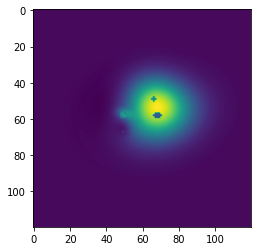

In [19]:
#images.view(0)

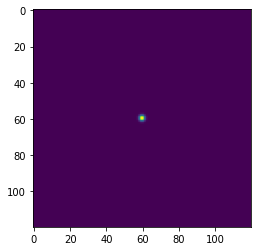

In [20]:
#psf_gauss.view()

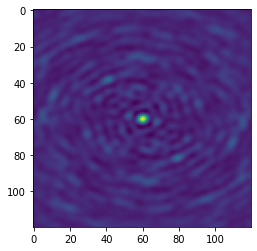

In [21]:
#psf_real.view()

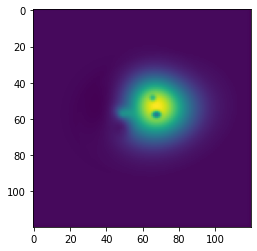

In [22]:
#dirtys_real.view(0)

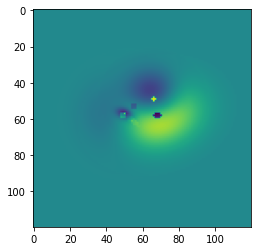

In [23]:
#images.view(1)

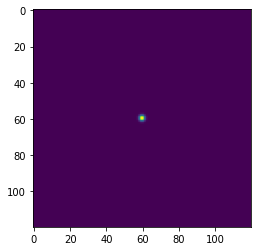

In [24]:
#psf_gauss.view()

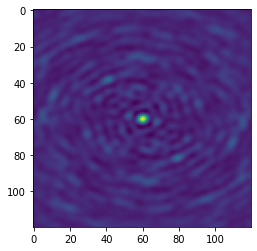

In [25]:
#psf_real.view()

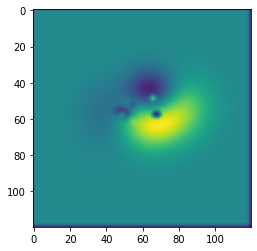

In [26]:
#dirtys_real.view(1)